In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb

### Read the csv files

In [19]:
"""Read the csv files"""
df_calendar=pd.read_csv('calendar.csv')
df_reviews=pd.read_csv('reviews.csv')
df_listings=pd.read_csv('listings.csv')

### Question 1--> What are the factors of price variability?

We have observed that there are several factors that have major influence on the price. Apartment is most available and therefore it has most of the ratings. Price variation in dorm and RVs are smaller compared to other property types.

By grouping then into other parameters, the difference is sometimes obvious. For example, when grouped by cancellation policy, the super strict categoty shows the highest price. This category has also lower number of counts. The bed type impacts the price.

### CRISP-DM method

Business understanding – What does the business need?
Data understanding – What data do we have / need? Is it clean?
Data preparation – How do we organize the data for modeling?
Modeling – What modeling techniques should we apply?
Evaluation – Which model best meets the business objectives?
Deployment – How do stakeholders access the results?

To implement the CRISP-DM method, we first eed to understand the business. The business is oriented towards customer satistaction and will be greatly interested to optimize the variations of rental price. Regarding data, the listing data provided us the price acroos differnt factors like property-type, policy etc. We will demonstrate couple of those factors in this project. The data will be prepared for visualization. We will use descriptive statistics to find answerss to the questions. We do not need modeling, evaluation and deployment to find solutions for the given questions.

### View the data by property type

here we may need to drop the null values since we are interested in reviews but not all the rental types have reviews. There are other options to impute teh mean or median values but we can remove the null values for now. There are 813 null values out of 3185 data points. Since the null is about 25%, I have decided the null values to be replaced by mean. 

In [ ]:
"""Filling the null values of rating by mean"""

df_listings["review_scores_rating"] = df_listings["review_scores_rating"].fillna(df_listings["review_scores_rating"].mean())

In [ ]:
"""View the rating by property type"""

data_rating=df_listings.groupby(['property_type']).mean()["review_scores_rating"]
data_rating.nlargest(data_rating.shape[0])

In [21]:
# """View the rating by property type after dropping null values"""

# data_rating=df_listings.groupby(['property_type']).mean()["review_scores_rating"].dropna()
# data_rating.nlargest(data_rating.shape[0])

Text(0, 0.5, 'Rating')

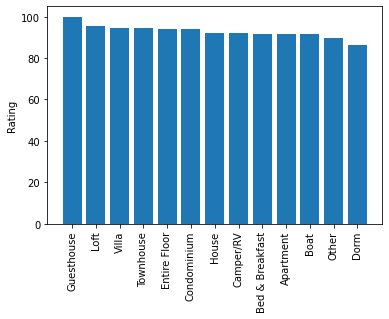

In [22]:
"""Barplot of the data by property type"""
plt.bar(data_rating.nlargest(data_rating.shape[0]).index, data_rating.nlargest(data_rating.shape[0]))
plt.xticks(rotation=90)
plt.ylabel('Rating')

In [23]:
"""View the data count by property type"""
data_count=df_listings.groupby(['property_type']).count()['price']
data_count.nlargest(data_count.shape[0])

property_type
Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: price, dtype: int64

Text(0, 0.5, 'Count')

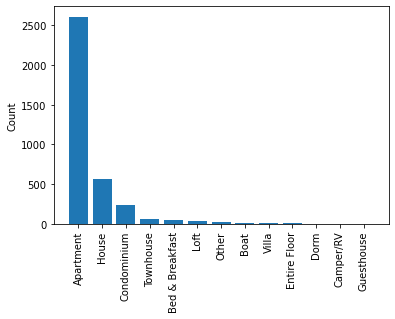

In [24]:
"""Barplot of the data count by property type"""
plt.bar(data_count.nlargest(data_count.shape[0]).index, data_count.nlargest(data_count.shape[0]))
plt.xticks(rotation=90)
plt.ylabel('Count')

### Define function to remove special sign

In [25]:
"""Function to remove $ sign"""

def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [26]:
df_listings.price = df_listings.price.apply(remove_sign,sign='$')

### Boxplot of different properties

Text(0, 0.5, 'Price ($)')

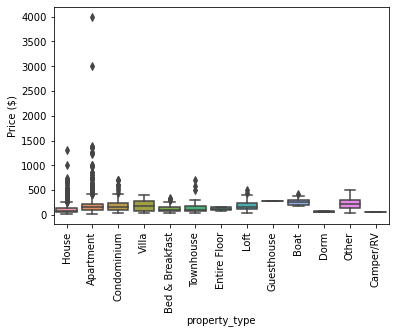

In [27]:
"""Boxplot of price across property type"""

sb.boxplot(y='price', x='property_type',data=df_listings)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

### Remove outliers

Text(0, 0.5, 'Price ($)')

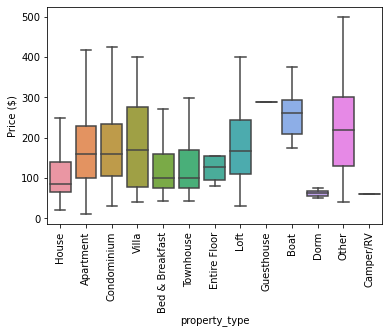

In [28]:
"""Remove outliers from the boxplot"""

sb.boxplot(y='price', x='property_type',data=df_listings, showfliers=False)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

### Boxplot by policy

Text(0, 0.5, 'Price ($)')

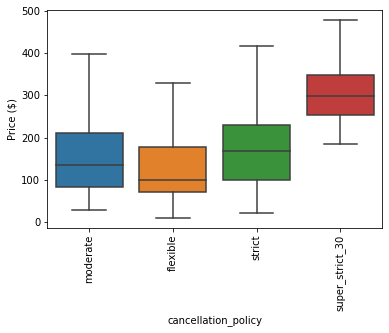

In [29]:
"""Boxplot of price across policy type"""

sb.boxplot(y='price', x='cancellation_policy',data=df_listings,showfliers=False)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

### Swarmplot by policy

C:\Python3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Price ($)')

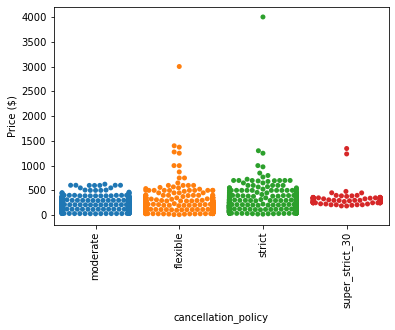

In [30]:
"""Swarmplot of price across property type"""

sb.swarmplot(y='price', x='cancellation_policy',data=df_listings)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

### Boxplot by bed-type

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Real Bed'),
  Text(1, 0, 'Pull-out Sofa'),
  Text(2, 0, 'Futon'),
  Text(3, 0, 'Airbed'),
  Text(4, 0, 'Couch')])

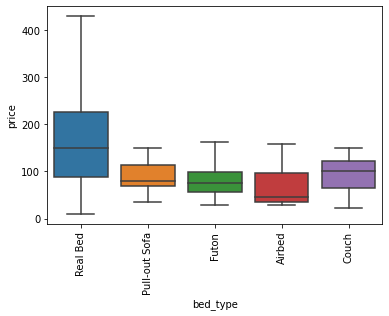

In [31]:
"""Boxplot of price across bed type"""

sb.boxplot(y='price', x='bed_type',data=df_listings,showfliers=False)
plt.xticks(rotation=90)

### Question 2--> Is there any correlation between the availability of rents and the price?

The plot above shows inversde correlation between the availability and the price. From Sep 2016, the availability starts dropping and the price starts going up. At some point in Feb 2017, there is a sharp drop in price although the availability remained same. The dip in price on Apr 2017 raised a peak in price during that time. The cyclic highs and lows or availability mostly corresponds to the weekends and middle of the week. 

In [40]:
"""Get count and average of the available data in df_calendar datafrmae"""

available_count = df_calendar.groupby(['date']).count()
avg_price = df_calendar.groupby('date').mean()

In [41]:
df_calendar.price = df_calendar.price.apply(remove_sign,sign='$')

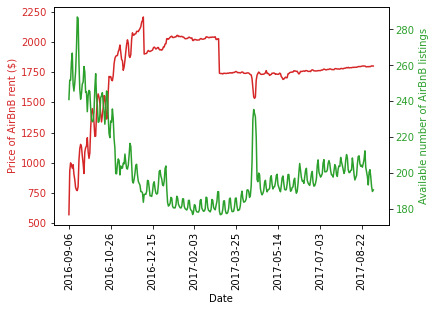

In [44]:
"""Plot the trend of price and availability of rentals against time"""

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price of AirBnB rent ($)', color=color)
ax1.plot(available_count.index,available_count['price'],color=color)
ax1.tick_params(axis='y', labelcolor=color)
max_xticks = 10
xloc = plt.MaxNLocator(max_xticks)
ax1.xaxis.set_major_locator(xloc)
plt.xticks(rotation=90)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Available number of AirBnB listings', color=color) 
ax2.plot(avg_price.index,avg_price['price'],color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_locator(xloc)
plt.xticks(rotation=90)

plt.show()


### Question 3--> Can the company impact the monthly variation of rents after analyzing the year long trend?

The boxplot shows Sep and Oct have the highest price. AirBnB can investigate (possible off-peak season) and inquire to lower down some rental's price to gain more revenue.

In [45]:
"""View rental data sum monthwise"""

df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')
df_month=df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))['price'].sum().sort_values()
df_month

date
September     7916920.0
March        10032940.0
April        10135248.0
February     10280396.0
June         10363503.0
May          10382979.0
October      10817676.0
July         11129255.0
August       11297226.0
January      11549466.0
December     11748139.0
November     11949813.0
Name: price, dtype: float64

In [46]:
"""View rental data count monthwise"""

df_monthly_count=df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))['price'].count().sort_values()
df_monthly_count

date
September    33398
October      46345
April        51382
June         52731
May          53600
July         54963
March        55181
August       55561
February     56810
November     58888
December     60997
January      63181
Name: price, dtype: int64

In [48]:
"""View rental data average monthwise"""

df_monthly_price=df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))['price'].mean().sort_values()
df_monthly_price

date
February     180.961028
March        181.818742
January      182.799671
December     192.601915
May          193.712295
June         196.535302
April        197.252890
July         202.486309
November     202.924416
August       203.330142
October      233.416248
September    237.047727
Name: price, dtype: float64

Text(0, 0.5, 'Price ($)')

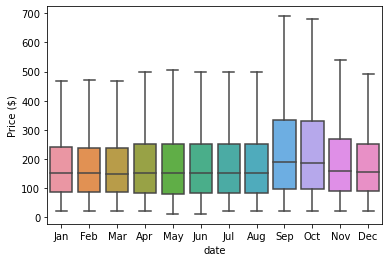

In [49]:
"""Boxplot rental price data monthwise"""

sb.boxplot(x=df_calendar['date'].dt.month,y='price',data=df_calendar, showfliers=False)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Price ($)')